In [24]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import pubplot

In [25]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [26]:
from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [27]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.046882715559202016,0.06524384325579918,0.18560653482909367,0.46074934236301524,0.8255098871682269,0.8,-0.1362753,-0.112392,-19.221085261376192,-19.24496856686621,38.39699048903732,38.42087379452734
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918,1.191639,0.7982611128344725,0,5,0.06372051945530774,0.4570983531540385,0.2926294159794649,0.7945189411289031,0.6897494213837649,0.8,-0.24928029,-0.20559199,-20.934403591738533,-20.978091889010262,39.85982053814966,39.90350883542139
346622,587726033302389048,134.55743422,2.16600461,18.550014,0.1138,4,G09_Y1_DX1_144,6,20.010414,19.038668,18.566885,18.253822,18.143185,371.63282964275743,37.85057036060853,G9,-233.93801379220335,237.5802013794907,12.61072730288422,0.47178268,0.45405717816186836,0,3,-0.0990554698929135,-0.08132996372861001,0.09240966370203835,0.13238969854732974,0.4318026494808805,2.12,-0.110386,-0.24125598,-19.28257952937744,-19.15170954475067,37.8325940252270

In [28]:
def color_plot(ctype, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    for count, jj in enumerate(np.unique(idx)):
        sample = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                     sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)
    plt.xlabel(ctype)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    plt.xlim(-0.5, max_col)
    plt.legend(frameon=False)

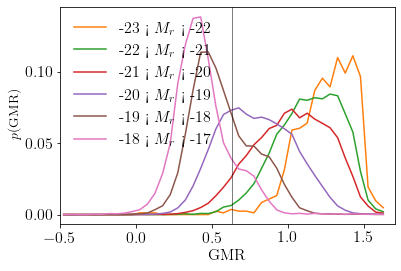

In [29]:
color_plot('GMR', max_col=1.7)

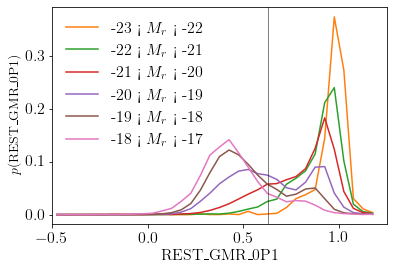

In [30]:
color_plot('REST_GMR_0P1', max_col=1.25)

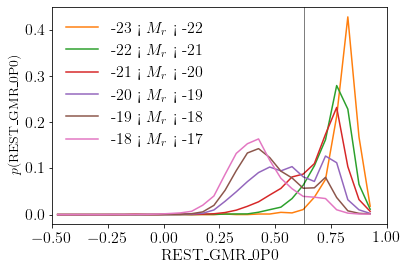

In [31]:
color_plot('REST_GMR_0P0')

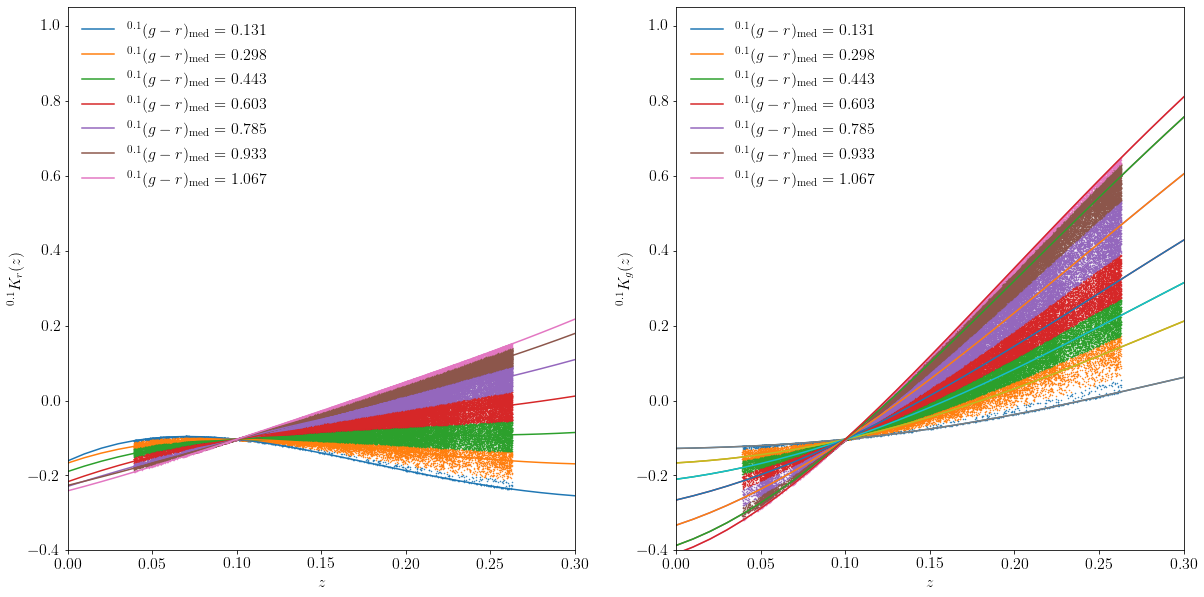

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

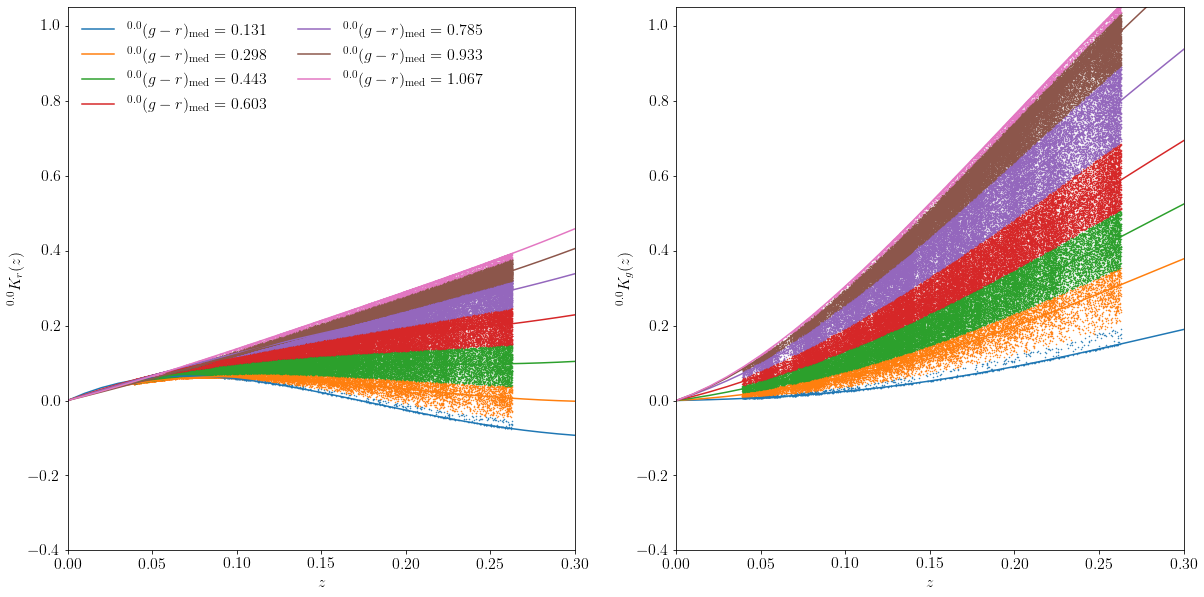

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=2, frameon=False, loc=2)

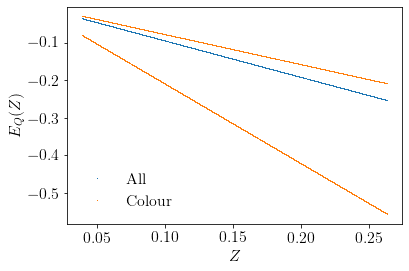

In [41]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$Z$')
pl.ylabel(r'$E_Q(Z)$')

pl.legend(frameon=False)

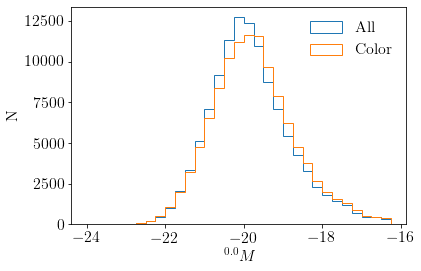

In [35]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)

pl.ylabel('N')

pl.legend(frameon=False)

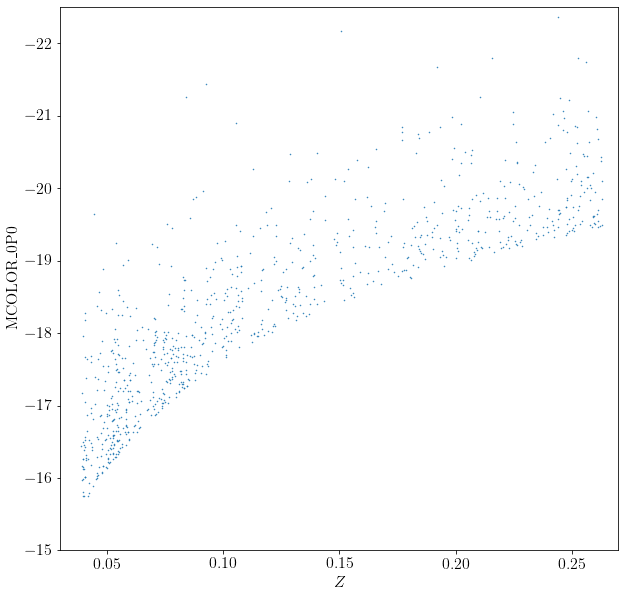

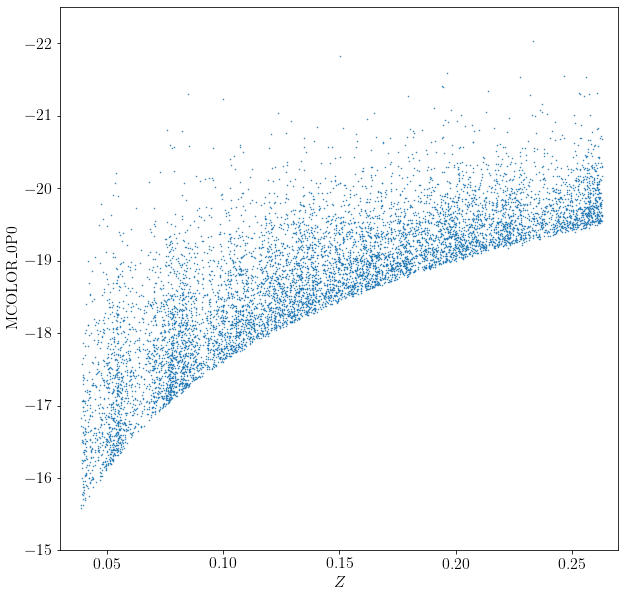

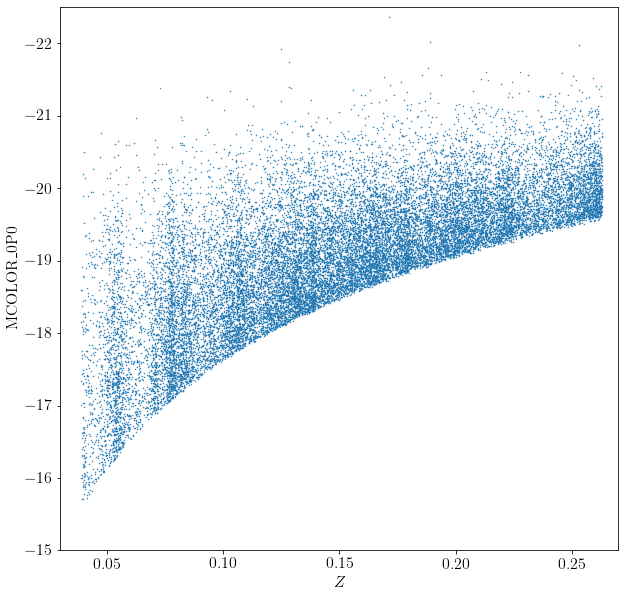

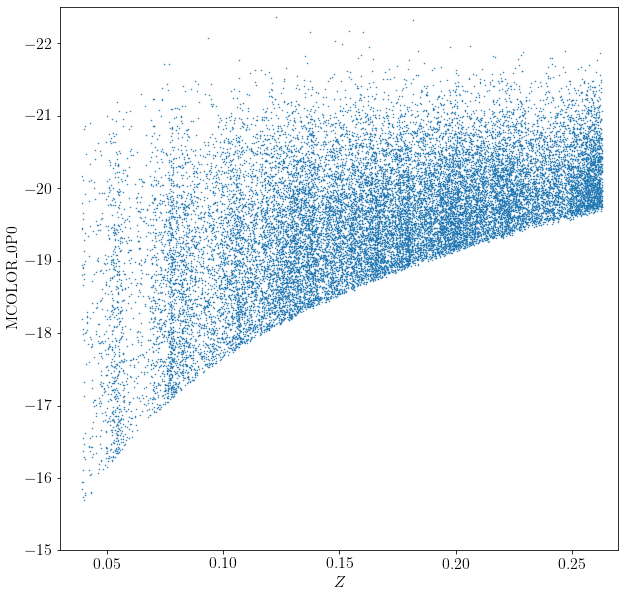

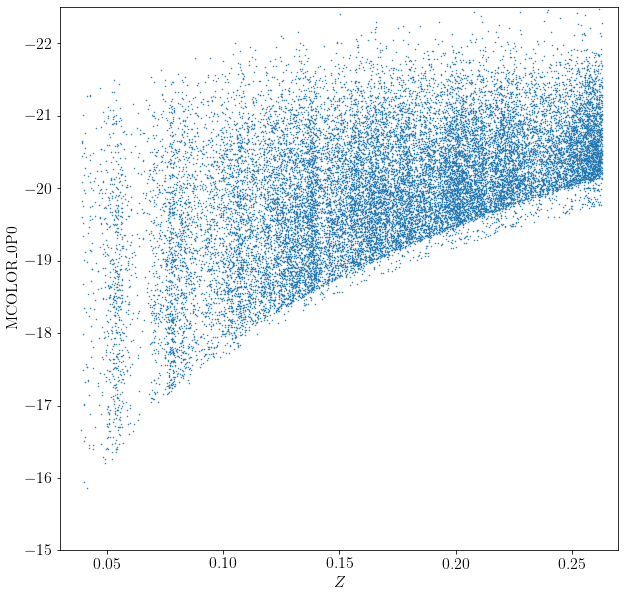

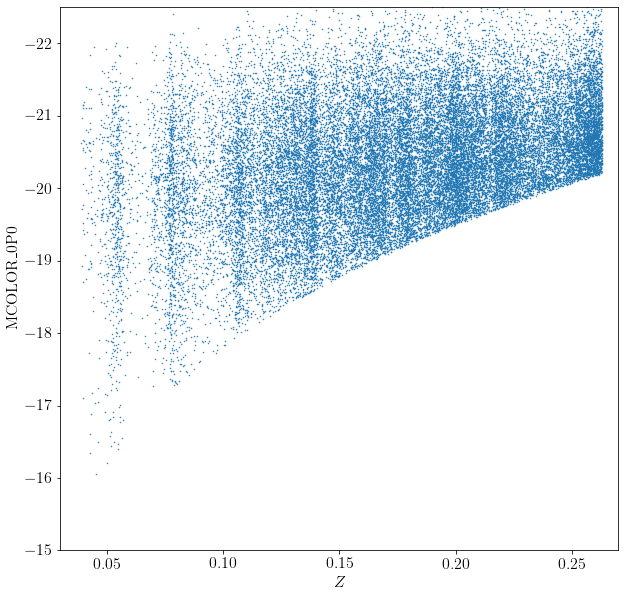

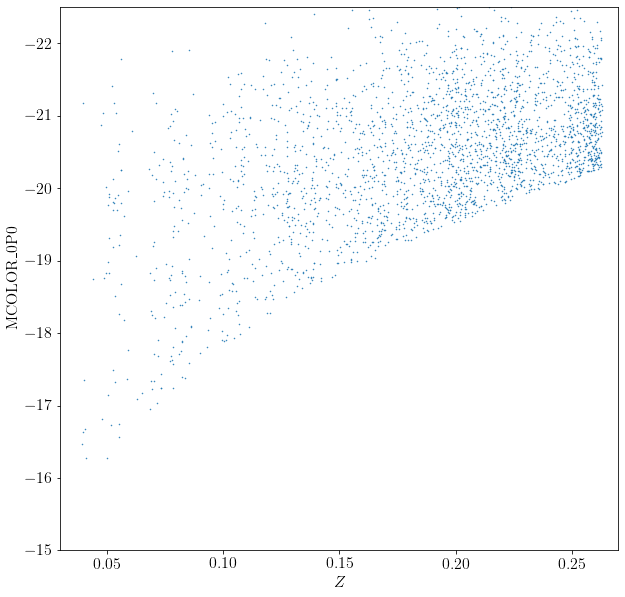

In [36]:
for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    pl.sca(ax)
    
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx

    plt.scatter(gama_kE['ZGAMA'][isin], gama_kE['MCOLOR_0P0'][isin], s=0.25)

    plt.xlabel(r'$Z$')
    plt.ylabel(r'MCOLOR_0P0')
    plt.xlim(0.03, 0.27)
    plt.ylim(-15., -22.5)    
    pl.show()

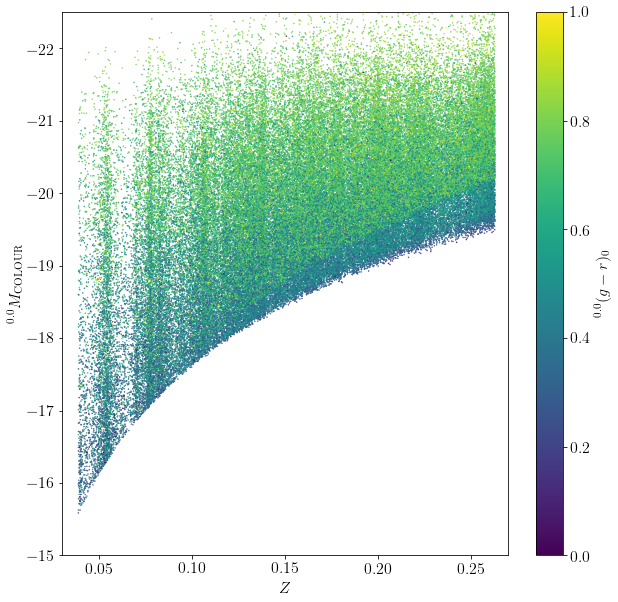

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$Z$')
plt.ylabel(r'$^{0.0}M_{\rm COLOUR}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)_{0}$')


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)_{obs}$')
plt.ylabel(r'$^{0.0}(g-r)_0$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='Z')

In [ ]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

In [ ]:
spurious = gama_kE[gama_kE['REST_GMR_0P1_WARN'].data > 0]
spurious.sort('GMR')
spurious

# Done.